https://stackoverflow.com/questions/7853332/how-to-change-git-log-date-formats

<code>git log --date=short | grep Date: | sed 's/Date://' > log_entries.dat</code>

In [44]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import time
import seaborn
from collections import Counter
import pandas

In [15]:
with open('log_entries.dat','r') as fil:
    cont = fil.read().split()

http://strftime.org/

In [38]:
year_and_month = Counter([datetime.datetime.strptime(x[:-3], "%Y-%m") for x in cont])

In [71]:
datetime.datetime.strptime(str(min(dict(year_and_month).keys()).year),"%Y")

datetime.datetime(2014, 1, 1, 0, 0)

In [61]:
df = pandas.DataFrame(list(dict(year_and_month).values()), 
                      list(dict(year_and_month).keys()  ), ["commits"])

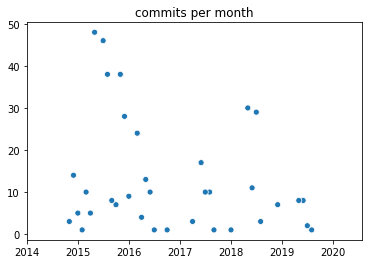

In [76]:
ax=seaborn.scatterplot(data=df)
_=ax.set_xlim(datetime.datetime.strptime(str(min(dict(year_and_month).keys()).year),"%Y"), None)
#ax.autoscale(tight=True)
_=ax.get_legend().remove()
_=plt.title('commits per month')
plt.savefig('pdg_commits_per_month.png')